<a href="https://colab.research.google.com/github/DocBot-Bangkit-2021/DocBot-MachineLearningModels/blob/main/Disease/Disease_Baseline_Model_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns

import os
import zipfile
import shutil
from glob import glob

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

In [ ]:
plt.style.use('seaborn')

# **Data Loading**
[Dermnet](https://www.kaggle.com/shubhamgoel27/dermnet)

[skin disease image](https://www.kaggle.com/sanskar7447/skin-disease-image)

[Various Skin Diseases Dataset](https://www.kaggle.com/akshitmadan/various-skin-diseases-dataset)

This dataset contains 4 classes.

**Link for dataset in Google Drive**

https://drive.google.com/file/d/1Eyhs_V7YYz6h-1ctzSoIo_nYehNsd_Vn/view?usp=sharing

https://www.kaggle.com/nurimammasri/diseases

In [ ]:
# Use this to download easily (only on google colab)
# !gdown --id 1Eyhs_V7YYz6h-1ctzSoIo_nYehNsd_Vn

**Download dataset in Google Drive**

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1Eyhs_V7YYz6h-1ctzSoIo_nYehNsd_Vn/view?usp=sharing' # The shareable link

In [ ]:
# fluff, id = link.split('d/')
id = link.split('d/')[1].split('/view?')[0]
print (id)

1Eyhs_V7YYz6h-1ctzSoIo_nYehNsd_Vn


In [ ]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('diseases.zip')  

In [ ]:
file_zip = 'diseases.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./diseases/')
zip_ref.close()

print(os.listdir('./diseases/'))

['conjunctivitis', 'nail_fungus', 'melanoma', 'cataracts']


In [ ]:
dir = './diseases/'
list_category = sorted(os.listdir(dir))
list_category

['cataracts', 'conjunctivitis', 'melanoma', 'nail_fungus']

# **Data Arrange**

In [ ]:
# check a lot of data for :
# {'cataracts': 0, 'conjunctivitis': 1, 'melanoma': 2, 'nail_fungus': 3}
cataracts_dir = os.path.join(dir,'cataracts')
conjunctivitis_dir = os.path.join(dir, 'conjunctivitis')
melanoma_dir = os.path.join(dir, 'melanoma')
nail_fungus_dir = os.path.join(dir,'nail_fungus')

print("Cataracts :", len(os.listdir(cataracts_dir)))
print("Conjunctivitis :", len(os.listdir(conjunctivitis_dir))) 
print("Melanoma :", len(os.listdir(melanoma_dir)))
print("Nail Fungus :", len(os.listdir(nail_fungus_dir)))

Cataracts : 547
Conjunctivitis : 956
Melanoma : 506
Nail Fungus : 580


In [ ]:
def is_image(dir, filename, verbose=False):
    name = os.path.join(dir, filename)

    data = open(name,'rb').read(10)

    # check if file is JPG or JPEG
    if data[:3] == b'\xff\xd8\xff':
        if verbose == True:
             print(filename+" is: JPG/JPEG.")
        return True

    # check if file is PNG
    if data[:8] == b'\x89\x50\x4e\x47\x0d\x0a\x1a\x0a':
        if verbose == True:
             print(filename+" is: PNG.")
        return True

    # check if file is GIF
    if data[:6] in [b'\x47\x49\x46\x38\x37\x61', b'\x47\x49\x46\x38\x39\x61']:
        if verbose == True:
             print(filename+" is: GIF.")
        return True

    return False

import os

category_sets = [cataracts_dir, conjunctivitis_dir, melanoma_dir, nail_fungus_dir]

# go through all files in desired folder
for image_dir in category_sets:
  for filename in os.listdir(image_dir):
     # check if file is actually an image file
     if is_image(image_dir, filename, verbose=False) == False:
          # if the file is not valid, remove it
          os.remove(os.path.join(image_dir, filename))

Make dataframe with `image` as feature and `target` as target. 
* `image` will be the image's path
* `target` will be the image's target.
    * `cataracts`: 0
    * `conjunctivitis`: 1
    * `melanoma`: 2
    * `nail_fungus`: 3

In [ ]:
cataracts = glob(cataracts_dir + '/*.jpg') + glob(cataracts_dir + '/*.png')
conjunctivitis = glob(conjunctivitis_dir + '/*.jpg') + glob(conjunctivitis_dir + '/*.png')
melanoma = glob(melanoma_dir + '/*.jpg') + glob(melanoma_dir + '/*.png')
nail_fungus = glob(nail_fungus_dir + '/*.jpg') + glob(nail_fungus_dir + '/*.png')

In [ ]:
def category_decide(x):
  value = 0
  if 'cataracts' in x:
    value = 0
  elif 'conjunctivitis' in x:
    value = 1
  elif 'melanoma' in x:
    value = 2
  else:
    value = 3
  return value

df = pd.DataFrame(columns=['image', 'target'])
df['image'] = cataracts + conjunctivitis + melanoma + nail_fungus
df['target'] = df['image'].apply(lambda x: category_decide(x))
df = df.sample(frac=1).reset_index(drop=True)

df.head()

image  target
0  ./diseases/conjunctivitis/266.jpg       1
1  ./diseases/conjunctivitis/175.jpg       1
2        ./diseases/melanoma/484.jpg       2
3     ./diseases/nail_fungus/456.jpg       3
4  ./diseases/conjunctivitis/131.jpg       1

In [ ]:
train_df, test_df = train_test_split(
    df, 
    test_size=0.2, 
    random_state=43, 
    stratify=df['target']
)
val_df, test_df = train_test_split(
    test_df, 
    test_size=0.25, 
    random_state=43, 
    stratify=test_df['target']
)

print("Train: {}".format(train_df.shape))
print("Cataracts  : {}".format(train_df[train_df['target'] == 0].shape[0]))
print("Conjunctivitis: {}".format(train_df[train_df['target'] == 1].shape[0]))
print("Melanoma  : {}".format(train_df[train_df['target'] == 2].shape[0]))
print("Nail Fungus: {}".format(train_df[train_df['target'] == 3].shape[0]))

print("\nVal: {}".format(val_df.shape))
print("Cataracts  : {}".format(val_df[val_df['target'] == 0].shape[0]))
print("Conjunctivitis: {}".format(val_df[val_df['target'] == 1].shape[0]))
print("Melanoma  : {}".format(val_df[val_df['target'] == 2].shape[0]))
print("Nail Fungus: {}".format(val_df[val_df['target'] == 3].shape[0]))

print("\nTest : {}".format(test_df.shape))
print("Cataracts  : {}".format(test_df[test_df['target'] == 0].shape[0]))
print("Conjunctivitis: {}".format(test_df[test_df['target'] == 1].shape[0]))
print("Melanoma  : {}".format(test_df[test_df['target'] == 2].shape[0]))
print("Nail Fungus: {}".format(test_df[test_df['target'] == 3].shape[0]))

Train: (1751, 2)
Cataracts  : 361
Conjunctivitis: 556
Melanoma  : 389
Nail Fungus: 445

Val: (328, 2)
Cataracts  : 67
Conjunctivitis: 104
Melanoma  : 73
Nail Fungus: 84

Test : (110, 2)
Cataracts  : 23
Conjunctivitis: 35
Melanoma  : 24
Nail Fungus: 28


In [ ]:
train_df.head()

image  target
23       ./diseases/nail_fungus/545.jpg       3
1655      ./diseases/nail_fungus/37.jpg       3
754   ./diseases/conjunctivitis/465.jpg       1
911      ./diseases/nail_fungus/155.jpg       3
450        ./diseases/cataracts/106.jpg       0

In [ ]:
val_df.head()

image  target
807   ./diseases/conjunctivitis/375.jpg       1
1097   ./diseases/conjunctivitis/33.jpg       1
1983        ./diseases/melanoma/455.jpg       2
681    ./diseases/conjunctivitis/67.jpg       1
2180        ./diseases/melanoma/215.jpg       2

In [ ]:
test_df.head()

image  target
1137        ./diseases/melanoma/212.jpg       2
724    ./diseases/conjunctivitis/11.jpg       1
1822  ./diseases/conjunctivitis/860.jpg       1
1958       ./diseases/cataracts/125.jpg       0
1810        ./diseases/cataracts/17.jpg       0

# **Exploratory Data Analyis (EDA)**

In [ ]:
print(list_category)

['cataracts', 'conjunctivitis', 'melanoma', 'nail_fungus']


In [ ]:
# check a lot of data for paper, rock and scissors
for  item in list_category:
  class_dir = os.path.join(dir,item)
  print(item ," : ",len(os.listdir(class_dir)),"images")

cataracts  :  544 images
conjunctivitis  :  949 images
melanoma  :  506 images
nail_fungus  :  580 images


In [ ]:
# check image (count, size, total)
from PIL import Image
total = 0

for x in list_category:
  dir_cat = os.path.join(dir, x)
  y = len(os.listdir(dir_cat))
  print(x+':', y)
  total = total + y
  
  size = (0,0)
  img_name = os.listdir(dir_cat)
  for i in range(5):
    img_path = os.path.join(dir_cat, img_name[i])
    img = Image.open(img_path)
    
    if size == img.size:
      continue
    else :
      size = img.size
      print('+ size = ',img.size)

print('\nTotal :', total)

cataracts: 544
+ size =  (493, 335)
+ size =  (310, 162)
+ size =  (480, 426)
+ size =  (317, 225)
+ size =  (444, 229)
conjunctivitis: 949
+ size =  (220, 177)
+ size =  (880, 492)
+ size =  (275, 183)
+ size =  (1020, 574)
+ size =  (678, 450)
melanoma: 506
+ size =  (720, 474)
+ size =  (720, 480)
+ size =  (720, 474)
+ size =  (720, 540)
+ size =  (231, 219)
nail_fungus: 580
+ size =  (720, 472)
+ size =  (465, 720)
+ size =  (720, 472)
+ size =  (1000, 622)
+ size =  (481, 720)

Total : 2579


cataracts


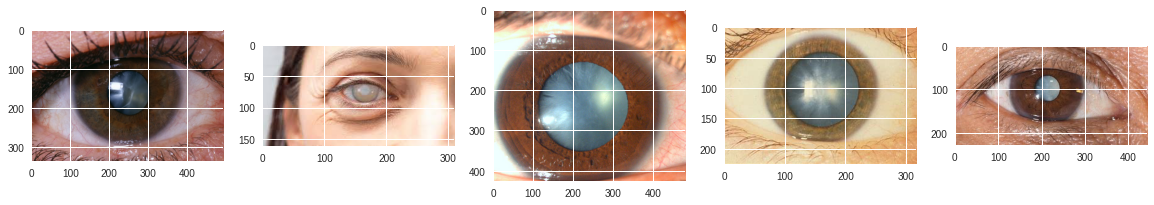

conjunctivitis


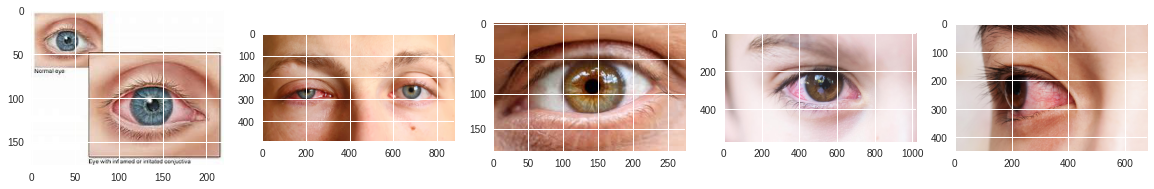

melanoma


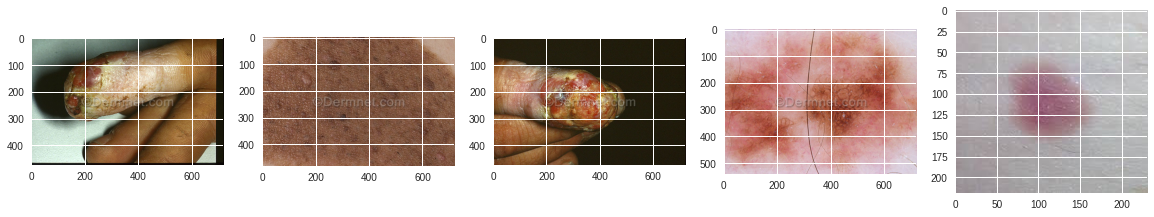

nail_fungus


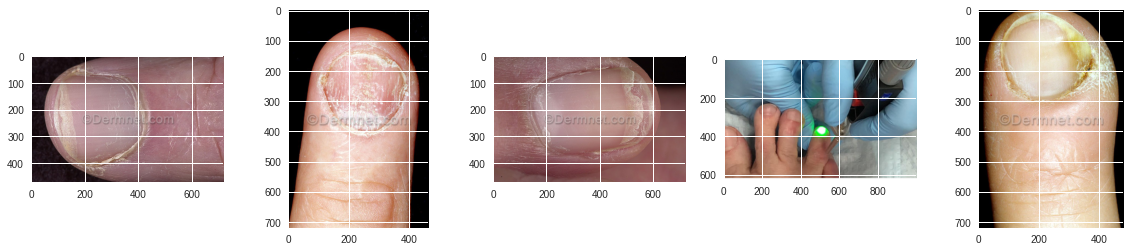

In [ ]:
# check images class
for  item in list_category:
  print(item)
  class_dir = os.path.join(dir,item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

# **Preprocessing Image**

Decode Image
1. Normalized, so the range value is 0-1
1. Resized to desired dimension (256 x 256)

Image will be augmented:
1. Random flip left or right
1. Random flip up or down
1. Random brightness
1. Random contrast

In [ ]:
dim = 150

def decode_image(filename, label=None, image_size=(dim, dim)):
    """
    Decode, normalize, and resize the image

    Parameters
    ----------
    filename: str
        The image file's name
    label: int, optional
        The image's label (default is None)
    image_size: tuple of int, optional
        The image's size. (default is (256, 256))

    Returns
    -------
    image:
        Decoded image
    label: optional
        One-hot encoded label
    """

    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32)  # Convert to float32
    image /= 255.0  # Normalize
    image = tf.image.resize(image, image_size)  #Resize
    
    if label == None:
        return image
    else:
        return image, tf.one_hot(label, depth=len(list_category))

def image_augment(image, label=None):
    """
    Augment the image.
    The image will randomly flip left, right, up, or down
    The image will be given random brightness and contrast

    Parameters
    ----------
    image: tf.image
        The image
    label: list, optional
        One-hot encoded label (default is None)

    Returns
    -------
    image:
        Augmented image
    label: optional
        One-hot encoded label
    """

    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, lower = 0.3, upper = 0.9)

    if label == None:
        return image
    else: 
        return image, label

# **Image Augmentation**

**Parallelizing data loading**

The prefetch transformation prefetches elements from the input dataset ahead of time. 

The number of items to prefetch should be equal to (or possibly higher than) the number of batches consumed by a single training step

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE
batch_size = 64

train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((train_df['image'], train_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .map(image_augment, num_parallel_calls=AUTO)
    .repeat()
    .shuffle(512)
    .batch(batch_size)
    .prefetch(AUTO)
)

val_dataset = (
    tf.data.Dataset
    .from_tensor_slices((val_df['image'], val_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((test_df['image'], test_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

In [ ]:
for img, label in train_dataset.take(1):
    print("Image shape: {}".format(img.numpy().shape))
    print("Label shape: {}".format(label.numpy().shape))

Image shape: (64, 150, 150, 3)
Label shape: (64, 4)


In [ ]:
def plot_dataset(dataset, rows, cols):
    """
    Plot dataset

    Parameters
    ----------
    dataset: tf.data.Dataset
        Dataset that has been processed
    rows: int
        Number of rows in plot
    cols: int 
        Number of columns in plot
    """
    for img, label in train_dataset.take(1):
        for i in range(rows*cols):
            ax = plt.subplot(rows, cols, i+1)
            plt.imshow(img[i].numpy())

            # Set the title's color
            if list_category[np.argmax(label[i].numpy())] == 'cataracts':
                color = 'red'
            elif list_category[np.argmax(label[i].numpy())] == 'conjunctivitis':
                color = 'yellow'
            elif list_category[np.argmax(label[i].numpy())] == 'melanoma':
                color = 'green'
            elif list_category[np.argmax(label[i].numpy())] == 'nail_fungus':
                color = 'orange'

            plt.title(list_category[np.argmax(label[i].numpy())], color=color)
            plt.axis('off')
            plt.grid(False)

        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


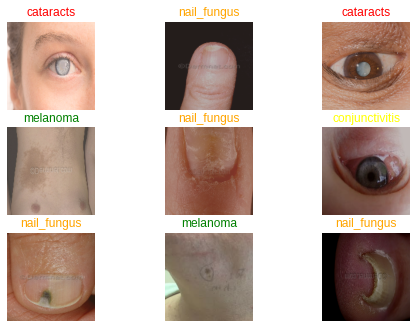

In [ ]:
plot_dataset(train_dataset, 3, 3)

In [ ]:
label_types = []
for category in list_category:
  label_types.append(category)
label_types

['cataracts', 'conjunctivitis', 'melanoma', 'nail_fungus']

# **Data Modeling 01**

## **Train Model 01**

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(dim, dim, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 4 class output neuron.
    tf.keras.layers.Dense(len(list_category), activation='softmax')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [ ]:
do_fine_tuning = False #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
else:
    optimizer = "RMSprop"

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 100,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
27/27 [==============================] - 46s 432ms/step - loss: 1.5008 - accuracy: 0.2911 - val_loss: 1.3812 - val_accuracy: 0.3500

Epoch 00001: val_accuracy improved from -inf to 0.35000, saving model to best_model_3_v1.h5
Epoch 2/100
27/27 [==============================] - 7s 276ms/step - loss: 1.3830 - accuracy: 0.3409 - val_loss: 1.3703 - val_accuracy: 0.3219

Epoch 00002: val_accuracy did not improve from 0.35000
Epoch 3/100
27/27 [==============================] - 9s 349ms/step - loss: 1.4037 - accuracy: 0.3218 - val_loss: 1.3178 - val_accuracy: 0.3844

Epoch 00003: val_accuracy improved from 0.35000 to 0.38438, saving model to best_model_3_v1.h5
Epoch 4/100
27/27 [==============================] - 10s 377ms/step - loss: 1.2956 - accuracy: 0.4120 - val_loss: 1.1264 - val_accuracy: 0.4812

Epoch 00004: val_accuracy improved from 0.38438 to 0.48125, saving model to best_model_3_v1.h5
Epoch 5/100
27/27 [==============================] - 9s 330ms/step - loss: 1.3316 - a

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.8444305658340454, 'accuracy': 0.7272727489471436}


### **Plot Model**

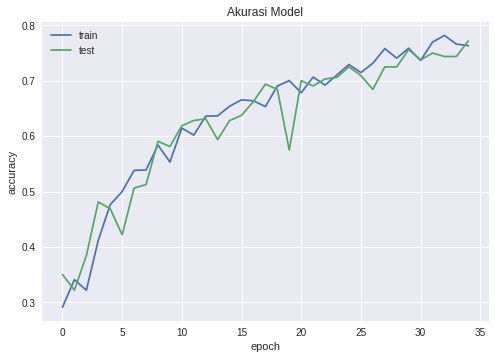

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

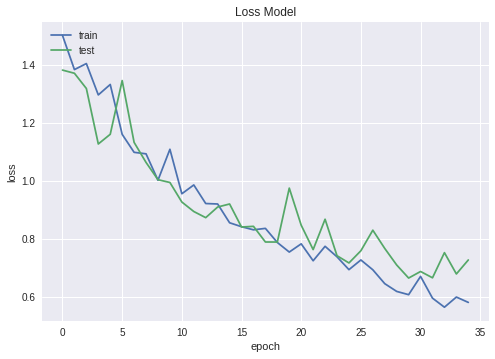

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

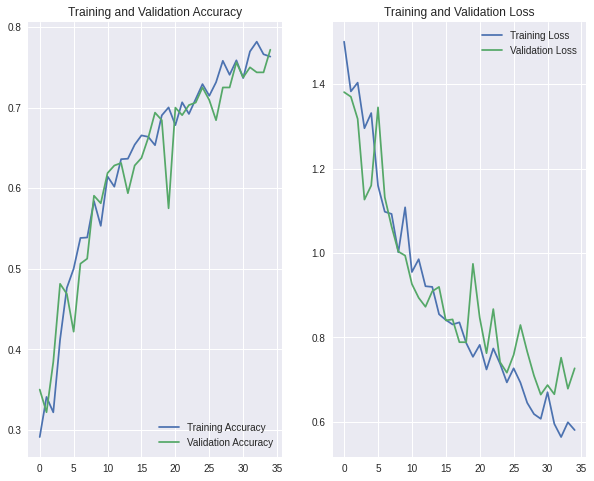

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving cataracts.jpg to cataracts.jpg
Cataracts


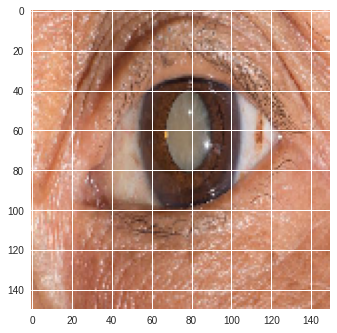

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(dim,dim))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[8.7982291e-01, 1.0511306e-01, 1.5063030e-02, 1.0156825e-06]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 232
drwxr-xr-x 2 root root   4096 Jun  4 07:15 assets
-rw-r--r-- 1 root root  22143 Jun  4 07:15 keras_metadata.pb
-rw-r--r-- 1 root root 203040 Jun  4 07:15 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 07:15 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v1.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v1.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v1.tflite')
    files.download('diseases_03_v1.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v1.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 232
drwxr-xr-x 2 root root   4096 Jun  4 07:15 assets
-rw-r--r-- 1 root root  22143 Jun  4 07:15 keras_metadata.pb
-rw-r--r-- 1 root root 201377 Jun  4 07:15 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 07:15 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v1_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v1_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v1_best.tflite')
    files.download('diseases_03_v1_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 02**

In [ ]:
import tensorflow as tf
# from tensorflow.keras import applications, optimizers

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(dim, dim, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 100,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
27/27 [==============================] - 13s 364ms/step - loss: 1.3957 - accuracy: 0.3113 - val_loss: 1.3239 - val_accuracy: 0.4250

Epoch 00001: val_accuracy improved from -inf to 0.42500, saving model to best_model_3_v2.h5
Epoch 2/100
27/27 [==============================] - 9s 329ms/step - loss: 1.2827 - accuracy: 0.4120 - val_loss: 1.1114 - val_accuracy: 0.5250

Epoch 00002: val_accuracy improved from 0.42500 to 0.52500, saving model to best_model_3_v2.h5
Epoch 3/100
27/27 [==============================] - 10s 358ms/step - loss: 1.0942 - accuracy: 0.5353 - val_loss: 1.0154 - val_accuracy: 0.6000

Epoch 00003: val_accuracy improved from 0.52500 to 0.60000, saving model to best_model_3_v2.h5
Epoch 4/100
27/27 [==============================] - 9s 318ms/step - loss: 1.0160 - accuracy: 0.5926 - val_loss: 1.0650 - val_accuracy: 0.6062

Epoch 00004: val_accuracy improved from 0.60000 to 0.60625, saving model to best_model_3_v2.h5
Epoch 5/100
27/27 [==========================

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 1.0837596654891968, 'accuracy': 0.581818163394928}


### **Plot Model**

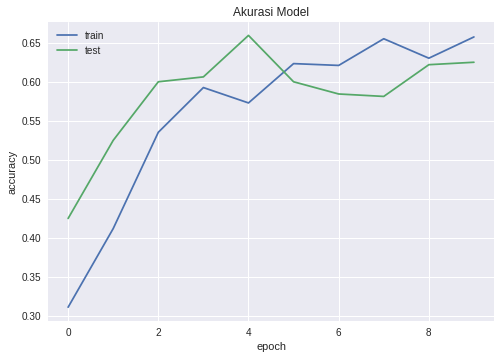

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

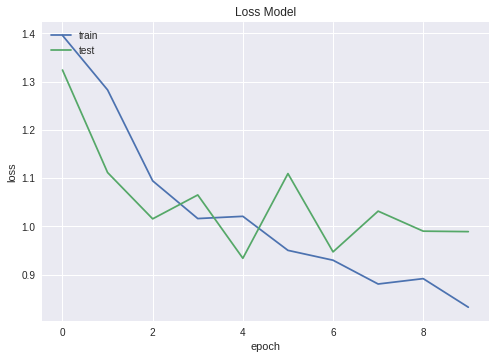

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

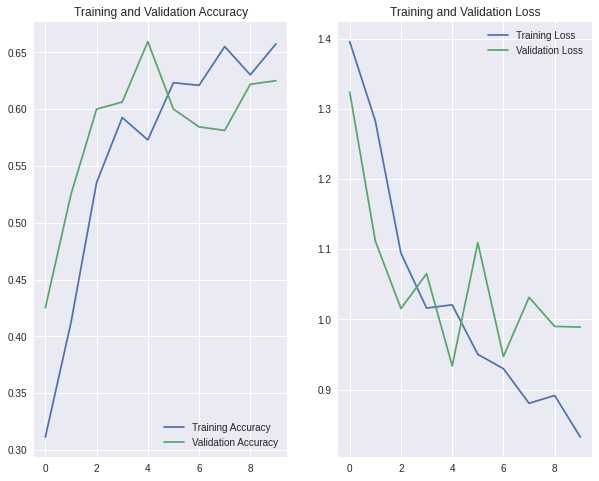

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving conjungtivitis.jpg to conjungtivitis.jpg
Conjunctivitis


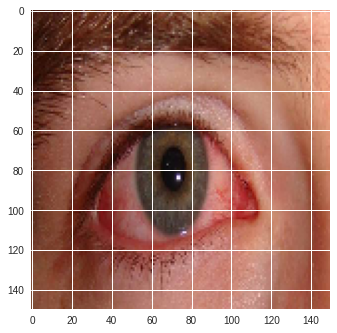

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(dim,dim))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[3.4954804e-03, 9.9031103e-01, 6.0745501e-03, 1.1893402e-04]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 244
drwxr-xr-x 2 root root   4096 Jun  4 07:18 assets
-rw-r--r-- 1 root root  23532 Jun  4 07:18 keras_metadata.pb
-rw-r--r-- 1 root root 215869 Jun  4 07:18 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 07:18 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v2.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v2.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v2.tflite')
    files.download('diseases_03_v2.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**


In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v2.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 244
drwxr-xr-x 2 root root   4096 Jun  4 07:19 assets
-rw-r--r-- 1 root root  23532 Jun  4 07:19 keras_metadata.pb
-rw-r--r-- 1 root root 214109 Jun  4 07:19 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 07:19 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v2_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v2_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v2_best.tflite')
    files.download('diseases_03_v2_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 03**

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(dim, dim, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 4 class output neuron.
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_dataset,
#                               validation_data=val_dataset,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 100,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
27/27 [==============================] - 14s 373ms/step - loss: 1.4068 - accuracy: 0.3281 - val_loss: 1.3187 - val_accuracy: 0.4406

Epoch 00001: val_accuracy improved from -inf to 0.44063, saving model to best_model_3_v3.h5
Epoch 2/100
27/27 [==============================] - 10s 353ms/step - loss: 1.3194 - accuracy: 0.3756 - val_loss: 1.2965 - val_accuracy: 0.3688

Epoch 00002: val_accuracy did not improve from 0.44063
Epoch 3/100
27/27 [==============================] - 9s 329ms/step - loss: 1.2234 - accuracy: 0.4491 - val_loss: 1.3228 - val_accuracy: 0.4563

Epoch 00003: val_accuracy improved from 0.44063 to 0.45625, saving model to best_model_3_v3.h5
Epoch 4/100
27/27 [==============================] - 10s 367ms/step - loss: 1.1649 - accuracy: 0.4850 - val_loss: 1.0987 - val_accuracy: 0.5188

Epoch 00004: val_accuracy improved from 0.45625 to 0.51875, saving model to best_model_3_v3.h5
Epoch 5/100
27/27 [==============================] - 10s 387ms/step - loss: 1.1154 -

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.9100604057312012, 'accuracy': 0.581818163394928}


### **Plot Model**

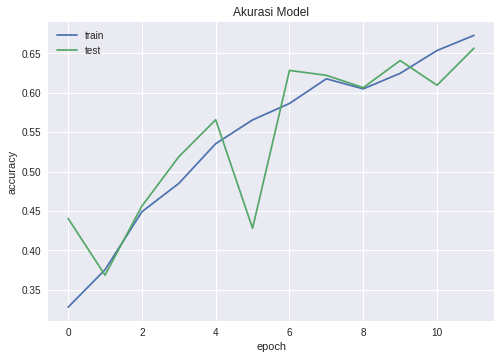

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

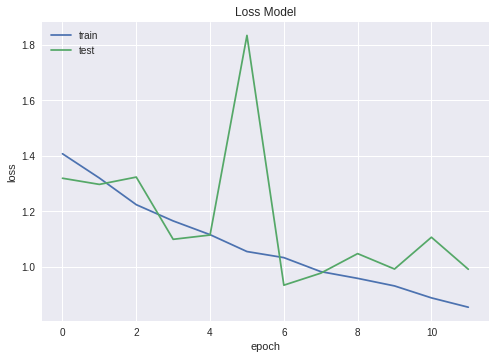

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

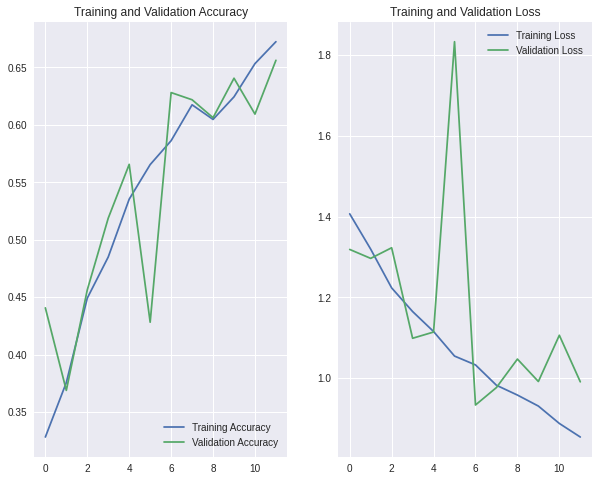

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving download.jpg to download.jpg
Conjunctivitis


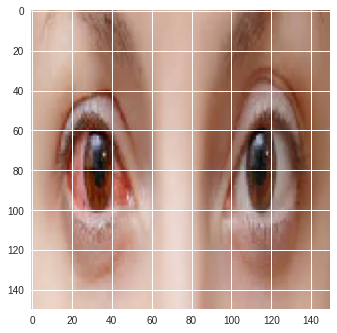

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(dim,dim))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[0.2082962 , 0.77726936, 0.00091837, 0.01351603]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 252
drwxr-xr-x 2 root root   4096 Jun  4 07:25 assets
-rw-r--r-- 1 root root  26746 Jun  4 07:25 keras_metadata.pb
-rw-r--r-- 1 root root 217445 Jun  4 07:25 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 07:25 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v3.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v3.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v3.tflite')
    files.download('diseases_03_v3.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v3.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 248
drwxr-xr-x 2 root root   4096 Jun  4 07:25 assets
-rw-r--r-- 1 root root  26746 Jun  4 07:25 keras_metadata.pb
-rw-r--r-- 1 root root 215582 Jun  4 07:25 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 07:25 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v3_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v3_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v3_best.tflite')
    files.download('diseases_03_v3_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 04**

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(dim, dim, 3))),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(list_category), activation='softmax')  
])
model.layers[0].trainable = False

234553344/234545216 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 1028      
Total params: 84,678,916
Trainable params: 26,347,268
Non-trainable params: 58,331,648
_________________________________

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_dataset,
#                               validation_data=val_dataset,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 100,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
27/27 [==============================] - 24s 459ms/step - loss: 9.9811 - accuracy: 0.7118 - val_loss: 2.1059 - val_accuracy: 0.7219

Epoch 00001: val_accuracy improved from -inf to 0.72188, saving model to best_model_3_v4.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
27/27 [==============================] - 10s 356ms/step - loss: 1.2065 - accuracy: 0.8194 - val_loss: 1.0846 - val_accuracy: 0.8500

Epoch 00002: val_accuracy improved from 0.72188 to 0.85000, saving model to best_model_3_v4.h5
Epoch 3/100
27/27 [==============================] - 9s 327ms/step - loss: 0.7125 - accuracy: 0.8565 - val_loss: 0.8951 - val_accuracy: 0.8406

Epoch 00003: val_accuracy did not improve from 0.85000
Epoch 4/100
27/27 [==============================] - 8s 317ms/step - loss: 0.7355 - accuracy: 0.8657 - val_loss: 0.8075 - val_accuracy: 0.8656

Epoch 00004: val_accuracy improved from 0.85000 to 0.86563, saving model to best_model_3_v4.h5
Epoch 5/100
27/27 [==============================] - 8s 313ms/step - loss: 0.5521 - accuracy: 0.8796 - val_loss: 0.5779 - val_accuracy: 0.9094

Epoch 00005: val_accuracy improved from 0.86563 to 0.90938, saving model to best_model_3_v4.h5
Epoch 6/100
27/27 [==============================] - 8s 308ms/step - loss: 0.4288 -

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.7406031489372253, 'accuracy': 0.9272727370262146}


### **Plot Model**

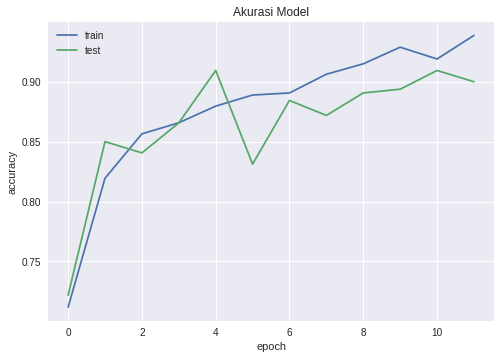

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

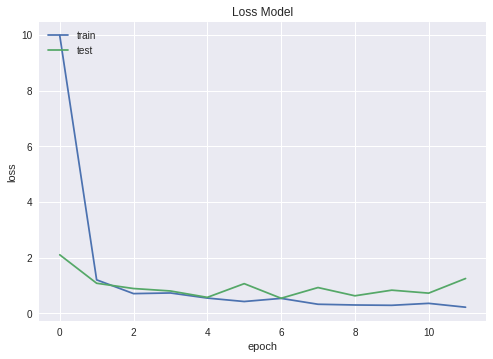

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

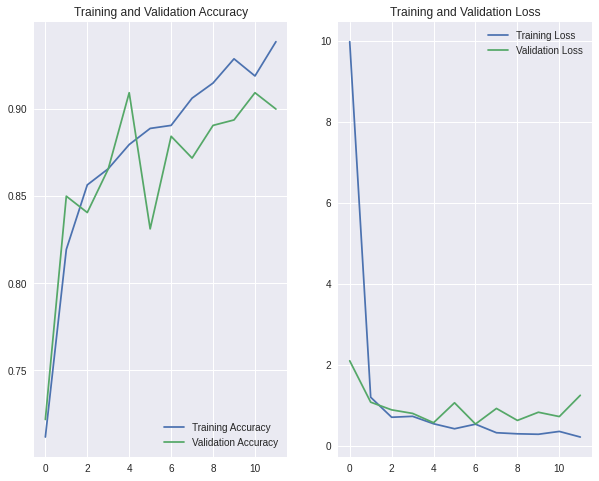

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving melanoma.jpg to melanoma.jpg
Melanoma


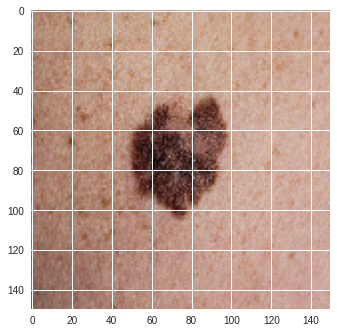

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(dim,dim))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[0., 0., 1., 0.]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 15184
drwxr-xr-x 2 root root     4096 Jun  4 07:32 assets
-rw-r--r-- 1 root root  1735735 Jun  4 07:32 keras_metadata.pb
-rw-r--r-- 1 root root 13803454 Jun  4 07:32 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  4 07:32 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v4.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v4.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v4.tflite')
    files.download('diseases_03_v4.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v4.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 15192
drwxr-xr-x 2 root root     4096 Jun  4 07:34 assets
-rw-r--r-- 1 root root  1735734 Jun  4 07:34 keras_metadata.pb
-rw-r--r-- 1 root root 13807976 Jun  4 07:34 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  4 07:34 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v4_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v4_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v4_best.tflite')
    files.download('diseases_03_v4_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 05**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121

model = tf.keras.Sequential([
    DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=(dim, dim, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

In [ ]:
do_fine_tuning = True #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
else:
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v5.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 100,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
27/27 [==============================] - 28s 472ms/step - loss: 1.3001 - accuracy: 0.5029 - val_loss: 0.7553 - val_accuracy: 0.7281

Epoch 00001: val_accuracy improved from -inf to 0.72812, saving model to best_model_3_v5.h5
Epoch 2/100
27/27 [==============================] - 11s 400ms/step - loss: 0.4734 - accuracy: 0.8189 - val_loss: 0.5819 - val_accuracy: 0.8125

Epoch 00002: val_accuracy improved from 0.72812 to 0.81250, saving model to best_model_3_v5.h5
Epoch 3/100
27/27 [==============================] - 11s 395ms/step - loss: 0.2770 - accuracy: 0.8999 - val_loss: 0.4012 - val_accuracy: 0.9187

Epoch 00003: val_accuracy improved from 0.81250 to 0.91875, saving model to best_model_3_v5.h5
Epoch 4/100
27/27 [==============================] - 11s 392ms/step - loss: 0.1981 - accuracy: 0.9340 - val_loss: 0.3291 - val_accuracy: 0.9281

Epoch 00004: val_accuracy improved from 0.91875 to 0.92813, saving model to best_model_3_v5.h5
Epoch 5/100
27/27 [========================

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.14622719585895538, 'accuracy': 0.9727272987365723}


### **Plot Model**

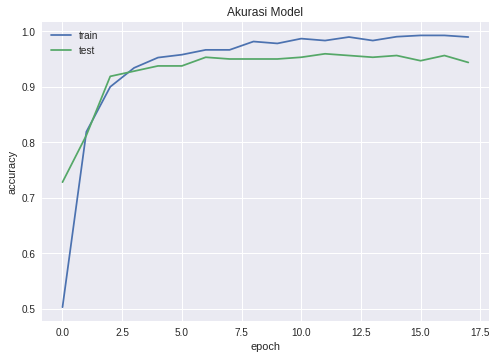

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

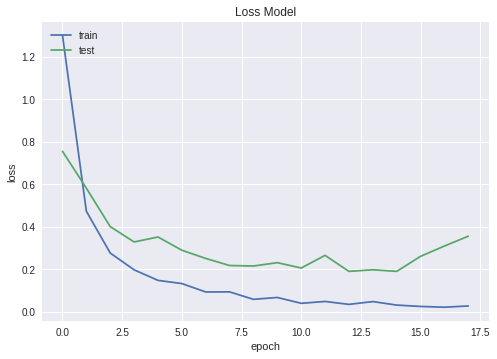

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

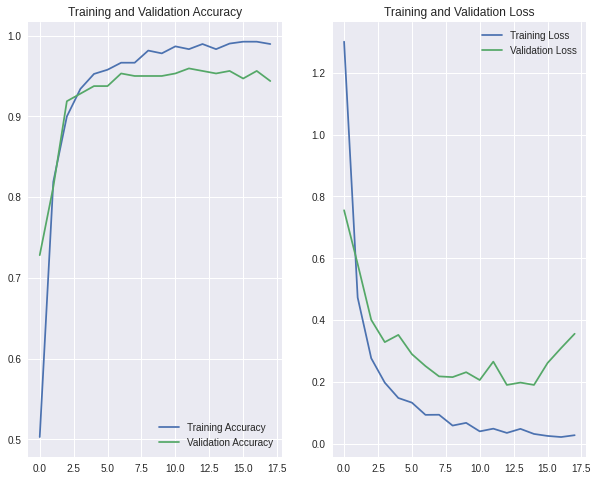

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving nail funggus.jpg to nail funggus.jpg
Nail Fungus


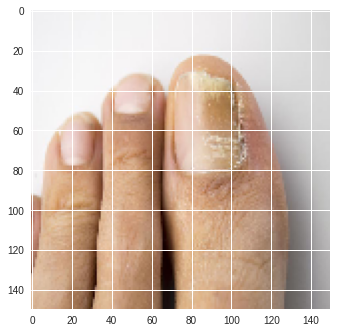

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[5.7350003e-11, 3.7391604e-11, 8.2896207e-10, 1.0000000e+00]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 12544
drwxr-xr-x 2 root root     4096 Jun  4 07:40 assets
-rw-r--r-- 1 root root  1308111 Jun  4 07:40 keras_metadata.pb
-rw-r--r-- 1 root root 11523831 Jun  4 07:40 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  4 07:40 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v5.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v5.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v5.tflite')
    files.download('diseases_03_v5.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v5.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 12528
drwxr-xr-x 2 root root     4096 Jun  4 07:41 assets
-rw-r--r-- 1 root root  1308111 Jun  4 07:41 keras_metadata.pb
-rw-r--r-- 1 root root 11505764 Jun  4 07:41 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  4 07:41 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v5_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v5_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v5_best.tflite')
    files.download('diseases_03_v5_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 06**

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-06-04 07:42:20--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.240, 172.217.8.16, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   231MB/s    in 0.4s    

2021-06-04 07:42:21 (231 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(dim, dim, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(local_weights_file)

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(len(list_category), activation='softmax')(x) 

model = tf.keras.Model(pre_trained_model.input, x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# Fine Tuning
NUM_LAYERS = 10 #@param {type:"slider", min:1, max:50, step:1}
do_fine_tuning = True #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

    # Make all the layers in the pre-trained model trainable
    for layer in pre_trained_model.layers:
        layer.trainable = True
else:
    optimizer = 'adam'

    # Make all the layers in the pre-trained model non-trainable
    for layer in pre_trained_model.layers:
        layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v6.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 100,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
27/27 [==============================] - 18s 369ms/step - loss: 0.8053 - accuracy: 0.6875 - val_loss: 0.5036 - val_accuracy: 0.8125

Epoch 00001: val_accuracy improved from -inf to 0.81250, saving model to best_model_3_v6.h5
Epoch 2/100
27/27 [==============================] - 9s 322ms/step - loss: 0.2931 - accuracy: 0.9109 - val_loss: 0.3441 - val_accuracy: 0.8781

Epoch 00002: val_accuracy improved from 0.81250 to 0.87813, saving model to best_model_3_v6.h5
Epoch 3/100
27/27 [==============================] - 8s 291ms/step - loss: 0.1989 - accuracy: 0.9358 - val_loss: 0.2410 - val_accuracy: 0.9219

Epoch 00003: val_accuracy improved from 0.87813 to 0.92188, saving model to best_model_3_v6.h5
Epoch 4/100
27/27 [==============================] - 8s 285ms/step - loss: 0.1296 - accuracy: 0.9589 - val_loss: 0.1820 - val_accuracy: 0.9500

Epoch 00004: val_accuracy improved from 0.92188 to 0.95000, saving model to best_model_3_v6.h5
Epoch 5/100
27/27 [===========================

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.05499500036239624, 'accuracy': 0.9727272987365723}


### **Plot Model**

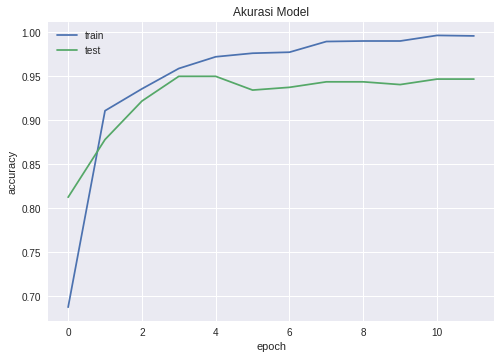

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

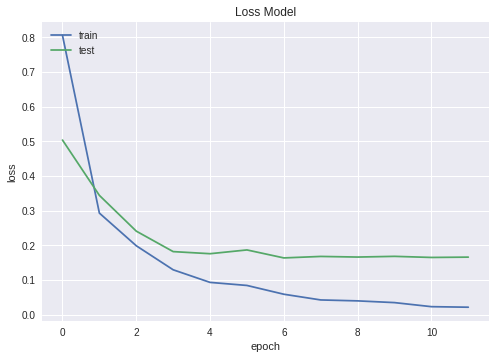

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

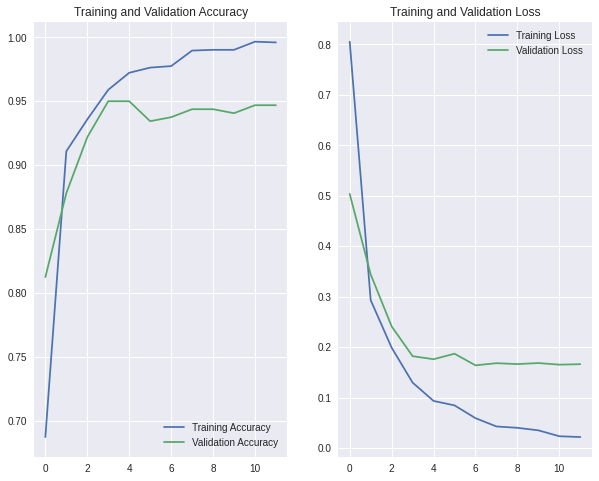

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving cataracts.jpg to cataracts (1).jpg
Cataracts


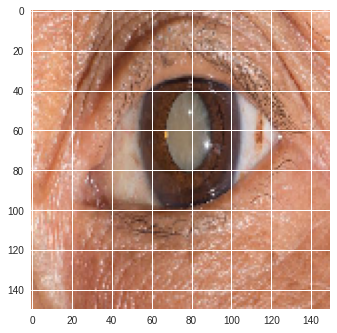

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[9.9999583e-01, 1.0924795e-06, 3.0359333e-06, 3.9625721e-08]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 5380
drwxr-xr-x 2 root root    4096 Jun  4 07:46 assets
-rw-r--r-- 1 root root  480157 Jun  4 07:46 keras_metadata.pb
-rw-r--r-- 1 root root 5016571 Jun  4 07:46 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  4 07:46 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v6.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v6.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v6.tflite')
    files.download('diseases_03_v6.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v6.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 5380
drwxr-xr-x 2 root root    4096 Jun  4 07:47 assets
-rw-r--r-- 1 root root  480157 Jun  4 07:47 keras_metadata.pb
-rw-r--r-- 1 root root 5016804 Jun  4 07:47 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  4 07:47 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v6_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v6_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v6_best.tflite')
    files.download('diseases_03_v6_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 07**

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import VGG19

model = tf.keras.models.Sequential([
    VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(dim, dim, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  
])
model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 1028      
Total params: 24,351,556
Trainable params: 4,327,172
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v7.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_dataset,
#                               validation_data=val_dataset,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 100,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
27/27 [==============================] - 17s 319ms/step - loss: 2.6133 - accuracy: 0.4583 - val_loss: 0.8056 - val_accuracy: 0.6531

Epoch 00001: val_accuracy improved from -inf to 0.65312, saving model to best_model_3_v7.h5
Epoch 2/100
27/27 [==============================] - 8s 304ms/step - loss: 0.9594 - accuracy: 0.6181 - val_loss: 1.3964 - val_accuracy: 0.5250

Epoch 00002: val_accuracy did not improve from 0.65312
Epoch 3/100
27/27 [==============================] - 7s 281ms/step - loss: 0.8086 - accuracy: 0.6696 - val_loss: 0.7118 - val_accuracy: 0.7781

Epoch 00003: val_accuracy improved from 0.65312 to 0.77812, saving model to best_model_3_v7.h5
Epoch 4/100
27/27 [==============================] - 8s 287ms/step - loss: 0.7050 - accuracy: 0.7245 - val_loss: 1.0234 - val_accuracy: 0.6687

Epoch 00004: val_accuracy did not improve from 0.77812
Epoch 5/100
27/27 [==============================] - 8s 294ms/step - loss: 0.6659 - accuracy: 0.7269 - val_loss: 0.6544 - val_

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.36543428897857666, 'accuracy': 0.8818181753158569}


### **Plot Model**

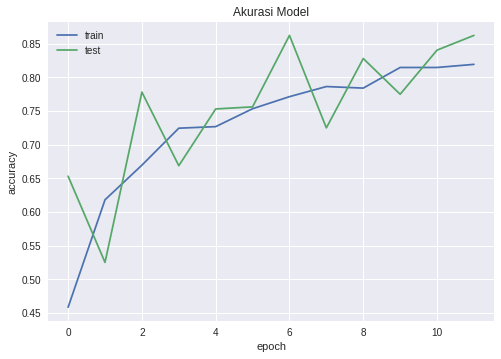

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

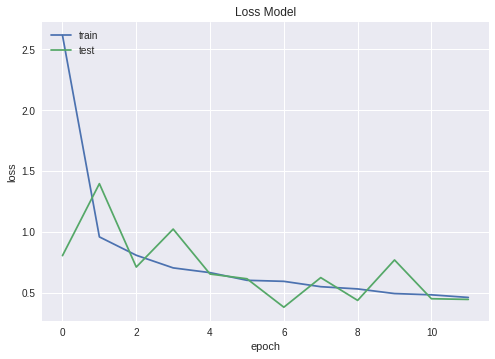

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

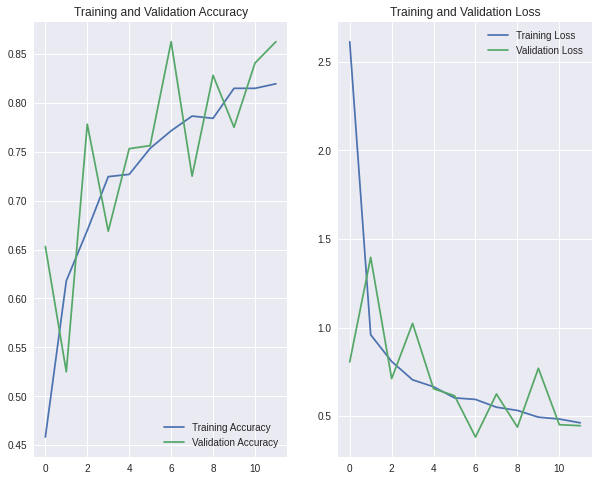

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving download.jpg to download (1).jpg
Conjunctivitis


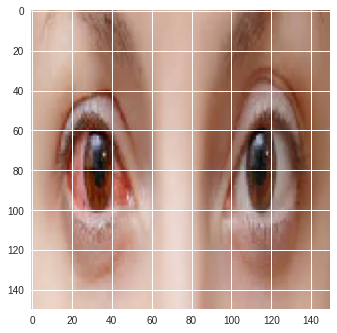

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[4.3139878e-01, 5.6513971e-01, 3.3694319e-03, 9.2113420e-05]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 636
drwxr-xr-x 2 root root   4096 Jun  4 07:54 assets
-rw-r--r-- 1 root root  92593 Jun  4 07:54 keras_metadata.pb
-rw-r--r-- 1 root root 547921 Jun  4 07:54 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 07:54 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v7.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v7.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v7.tflite')
    files.download('diseases_03_v7.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v7.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 636
drwxr-xr-x 2 root root   4096 Jun  4 07:54 assets
-rw-r--r-- 1 root root  92592 Jun  4 07:54 keras_metadata.pb
-rw-r--r-- 1 root root 546846 Jun  4 07:54 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  4 07:54 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v7_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v7_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v7_best.tflite')
    files.download('diseases_03_v7_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 08**

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:
dim = pixels

def decode_image(filename, label=None, image_size=(dim, dim)):
    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32)  # Convert to float32
    image /= 255.0  # Normalize
    image = tf.image.resize(image, image_size)  #Resize
    
    if label == None:
        return image
    else:
        return image, tf.one_hot(label, depth=len(list_category))

def image_augment(image, label=None):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, lower = 0.3, upper = 0.9)

    if label == None:
        return image
    else: 
        return image, label

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE
batch_size = 128

train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((train_df['image'], train_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .map(image_augment, num_parallel_calls=AUTO)
    .repeat()
    .shuffle(512)
    .batch(batch_size)
    .prefetch(AUTO)
)

val_dataset = (
    tf.data.Dataset
    .from_tensor_slices((val_df['image'], val_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((test_df['image'], test_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

In [ ]:
import tensorflow_hub as hub
do_fine_tuning = True #@param {type:"boolean"}

feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_21 (Dense)             (None, 256)               327936    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 1028      
Total params: 2,586,948
Trainable params: 2,552,836
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
    feature_extractor.trainable = True
else: 
    feature_extractor.trainable = False
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v8.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 100,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/100
 6/13 [============>.................] - ETA: 5s - loss: 2.0323 - accuracy: 0.2956WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2071s vs `on_train_batch_end` time: 0.5222s). Check your callbacks.


13/13 [==============================] - 24s 1s/step - loss: 1.7125 - accuracy: 0.4868 - val_loss: 1.2676 - val_accuracy: 0.7148

Epoch 00001: val_accuracy improved from -inf to 0.71484, saving model to best_model_3_v8.h5
Epoch 2/100
13/13 [==============================] - 12s 973ms/step - loss: 0.9118 - accuracy: 0.8798 - val_loss: 0.8928 - val_accuracy: 0.8711

Epoch 00002: val_accuracy improved from 0.71484 to 0.87109, saving model to best_model_3_v8.h5
Epoch 3/100
13/13 [==============================] - 13s 973ms/step - loss: 0.7370 - accuracy: 0.9345 - val_loss: 0.8256 - val_accuracy: 0.9062

Epoch 00003: val_accuracy improved from 0.87109 to 0.90625, saving model to best_model_3_v8.h5
Epoch 4/100
13/13 [==============================] - 12s 950ms/step - loss: 0.6858 - accuracy: 0.9453 - val_loss: 0.7906 - val_accuracy: 0.9258

Epoch 00004: val_accuracy improved from 0.90625 to 0.92578, saving model to best_model_3_v8.h5
Epoch 5/100
13/13 [==============================] - 12s 9

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.5930579900741577, 'accuracy': 0.9545454382896423}


### **Plot Model**

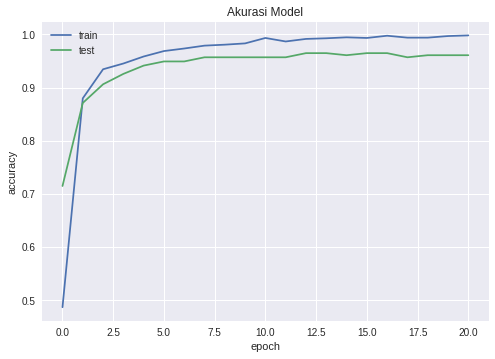

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

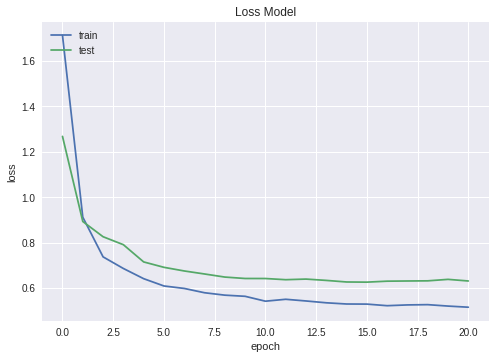

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

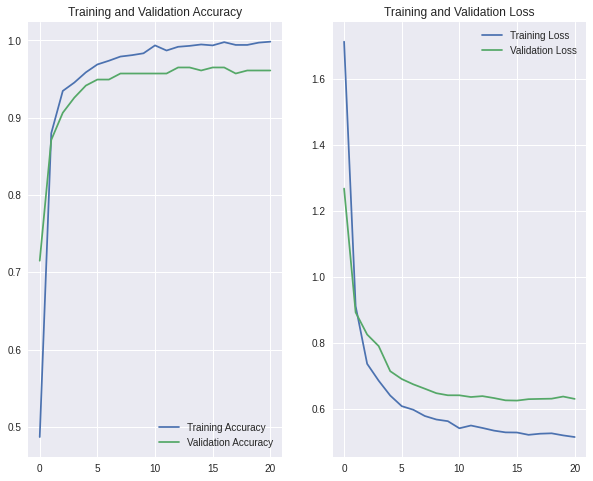

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving cataracts.jpg to cataracts (2).jpg
Cataracts


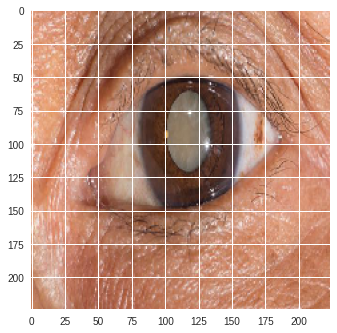

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Cataracts')
elif predicted_class_indices == 1:
  print('Conjunctivitis')
elif predicted_class_indices == 2:
  print('Melanoma')
else:
  print('Nail Fungus')

In [ ]:
classes

array([[9.9995959e-01, 9.7278271e-06, 2.7097147e-05, 3.5512039e-06]],
      dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



export_path = /tmp/1
total 2752
drwxr-xr-x 2 root root    4096 Jun  4 07:59 assets
-rw-r--r-- 1 root root    8045 Jun  4 07:59 keras_metadata.pb
-rw-r--r-- 1 root root 2798763 Jun  4 07:59 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  4 07:59 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v8.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v8.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v8.tflite')
    files.download('diseases_03_v8.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v8.h5', custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



INFO:tensorflow:Assets written to: /tmp/2/assets


INFO:tensorflow:Assets written to: /tmp/2/assets



export_path = /tmp/2
total 2068
drwxr-xr-x 2 root root    4096 Jun  4 08:00 assets
-rw-r--r-- 1 root root    5623 Jun  4 08:00 keras_metadata.pb
-rw-r--r-- 1 root root 2100610 Jun  4 08:00 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  4 08:00 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'diseases_03_v8_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('diseases_03_v8_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('diseases_03_v8_best.tflite')
    files.download('diseases_03_v8_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>